![Chemical structure of morphine, the prototypical opioid](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Morphin_-_Morphine.svg/282px-Morphin_-_Morphine.svg.png)


Chemical structure of morphine, the prototypical opioid, from [Wikipedia](https://en.wikipedia.org/wiki/File:Morphin_-_Morphine.svg)

# INTRO

This is my very first notebook on Kaggle. I started this only for one reason: to learn to explore datasets, to learn data science and to learn how to visualize using matplotlib. Also, the reason for chosing this specific dataset on opioid deaths: I like contributing to the planet and this world, so anything that helps the nature and the medicine, I am all in for it. Please forgive any mistakes for I am just a beginner. You are welcome to commment if you:

* think any new explaoration or visualization that can give a better analysis of the dataset
* find something that needs correction
* can give ideas on how to make the notebook better

CREDITS: <br/>
https://www.kaggle.com/yamqwe/opioid-overdose-deathse/   <br/>
https://data.world/health/opioid-overdose-deaths

ORIGINAL LINKS: <br>
https://www.kaggle.com/yamqwe/opioid-overdose-deathse <br/>
https://www.kaggle.com/arnuld/opioids-overdose-deaths-a-rough-cut-eda

# BEGIN

Next cell of code was automatically added by Kaggle. Kaggle notebook automatically imports Pandas, NumPy and the dataset file path. If you want to run it in your local/cloud environment then remove this cell but copy the imports to next cell before doing that. Then, you can use the **requirements.txt** to create a virtual environment to run it.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/opioid-overdose-deathse/health-opioid-overdose-deaths/Multiple Cause of Death, 1999-2014.csv
/kaggle/input/opioid-overdose-deathse/health-opioid-overdose-deaths/Multiple Cause of Death, 1999-2014 v1.1.csv


In [2]:
import matplotlib.pyplot as plt
from IPython.display import display


### After exploring the dataset I came to know that it has words like 'Suppressed' and 'Unreliable' instead of just NaN. So, we gonna treat those as NaN and read the dataset accordingly 

In [3]:
file_path = '/kaggle/input/opioid-overdose-deathse/health-opioid-overdose-deaths/Multiple Cause of Death, 1999-2014 v1.1.csv'
df = pd.read_csv(file_path, na_values=['Suppressed','Unreliable'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   State                                                            816 non-null    object 
 1   Year                                                             816 non-null    int64  
 2   Deaths                                                           803 non-null    float64
 3   Population                                                       816 non-null    int64  
 4   Crude Rate                                                       772 non-null    float64
 5   Crude Rate Lower 95% Confidence Interval                         803 non-null    float64
 6   Crude Rate Upper 95% Confidence Interval                         803 non-null    float64
 7   Prescriptions Dispensed by US Retailers in th

## FIRST IMPRESSIONS OF DATA

As you can see there are 8 columns but the **Non-Null Count** is not same for all of them. That means there are some values missing. So we will clean the dataset first. Instead of calling cleaning functions one by one, let's write a function to clean the dataset instead.  

In [4]:
# The structure of this function is based on "Avocado | EDA" done by "ks_lar_wtf"
# I have merely modified it to suit my needs

# https://www.kaggle.com/kslarwtf
# https://www.kaggle.com/kslarwtf/avocado-eda/notebook

def clean_data(d, dname=None):
    # Let's clean duplicates first
    temp = d.duplicated().sum()
    if temp:
        print(F"{temp} dupllicates found.\n")
        print("*** Removing Duplicates ***\n")
        d = d.drop_duplicates(ignore_index=True)
    
    # Let's check if we have any missing values
    temp = df.isna().sum().any()
    if temp:
        print("*** There are missing values in the data. Let's remove those ***\n")
        d = d.dropna()
    
    # Rename all Columns to lowercase 
    d.columns = d.columns.str.lower()
    
    # one column has name too long
    old_name = 'prescriptions dispensed by us retailers in that year (millions)'
    new_name = 'prescriptions dispensed'
    d = d.rename(columns={old_name: new_name})

    return d

In [5]:
# The structure of this function is based on "Avocado | EDA" done by "ks_lar_wtf"
# please refer to the links from the last cell
def examine_data(d, dname=None):
    print(F"*** Examining {dname} ***\n")
    display(d.head())
    display(d.info())
    display(d.columns)

In [6]:
df_cleaned = clean_data(df, "Opioid Overdose Deaths")
examine_data(df_cleaned, "Opioid Overdose Deaths -- Cleaned")

*** There are missing values in the data. Let's remove those ***

*** Examining Opioid Overdose Deaths -- Cleaned ***



,state,year,deaths,population,crude rate,crude rate lower 95% confidence interval,crude rate upper 95% confidence interval,prescriptions dispensed
0,Alabama,1999,39.0,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46.0,4447100,1.0,0.8,1.4,126
2,Alabama,2001,67.0,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75.0,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54.0,4503491,1.2,0.9,1.6,149


<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     772 non-null    object 
 1   year                                      772 non-null    int64  
 2   deaths                                    772 non-null    float64
 3   population                                772 non-null    int64  
 4   crude rate                                772 non-null    float64
 5   crude rate lower 95% confidence interval  772 non-null    float64
 6   crude rate upper 95% confidence interval  772 non-null    float64
 7   prescriptions dispensed                   772 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 54.3+ KB


None

Index(['state', 'year', 'deaths', 'population', 'crude rate',
       'crude rate lower 95% confidence interval',
       'crude rate upper 95% confidence interval', 'prescriptions dispensed'],
      dtype='object')

Now the **Non-Null Count** is same for all the columns, which means we have effectively removed any rows with missing values. Now we can start doing some visualizations to see what's this dataset has. Let's see which state has the highest death rate from opioid overdose  

state
California              27044.0
Florida                 19919.0
New York                16156.0
Texas                   15050.0
Ohio                    13623.0
Illinois                13072.0
North Carolina          10413.0
Massachusetts            9923.0
Washington               9528.0
Maryland                 9403.0
Pennsylvania             9304.0
Michigan                 8748.0
Tennessee                7467.0
Arizona                  7298.0
Virginia                 7210.0
New Jersey               6961.0
Missouri                 6460.0
Kentucky                 6283.0
Georgia                  6052.0
Nevada                   5954.0
Oklahoma                 5926.0
Wisconsin                5400.0
Utah                     5165.0
Colorado                 5155.0
West Virginia            4982.0
Oregon                   4933.0
New Mexico               4002.0
Indiana                  3758.0
Connecticut              3755.0
South Carolina           3165.0
Minnesota                3158.0
Lo

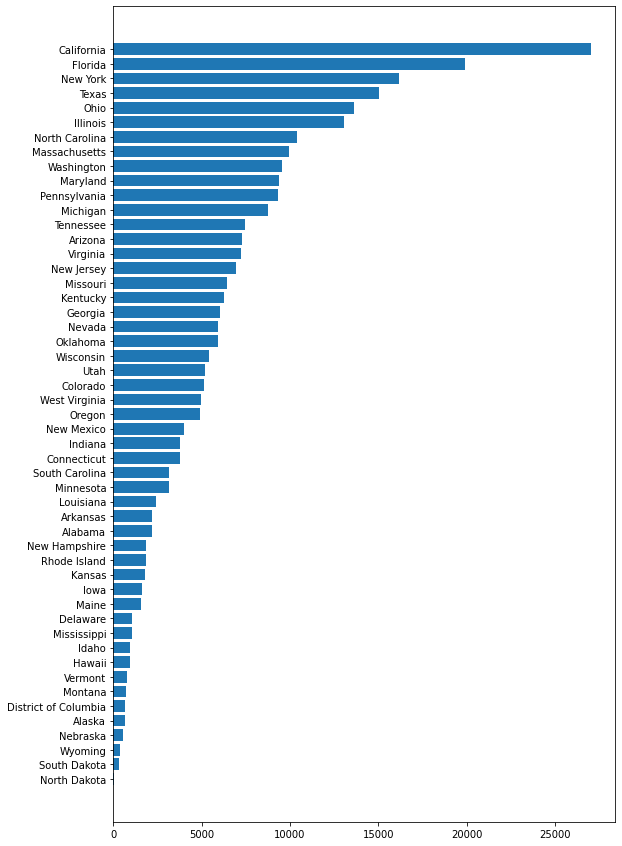

In [7]:
# California has highest death rate from opioid overdose
# top 3 states are: California, Florida and New York
statewise_deaths = df_cleaned.groupby('state')['deaths'].sum().sort_values(ascending=False)
display(statewise_deaths)
fig, ax = plt.subplots(figsize=(9,15))
ax.barh(statewise_deaths.index, statewise_deaths)
ax.invert_yaxis()


Let's see the sale of the opioids per state if that matches the state with the highest overdose death rates 

In [8]:
df_cleaned.groupby('state')['prescriptions dispensed'].sum().sort_values(ascending=False)

state
Alabama                 2794
Michigan                2794
Nevada                  2794
New Hampshire           2794
New Jersey              2794
New Mexico              2794
New York                2794
North Carolina          2794
Ohio                    2794
Oklahoma                2794
Oregon                  2794
Pennsylvania            2794
Rhode Island            2794
South Carolina          2794
Tennessee               2794
Texas                   2794
Utah                    2794
Virginia                2794
Washington              2794
West Virginia           2794
Wisconsin               2794
Minnesota               2794
Missouri                2794
Massachusetts           2794
Indiana                 2794
Arizona                 2794
Arkansas                2794
California              2794
Colorado                2794
Connecticut             2794
Delaware                2794
Florida                 2794
Georgia                 2794
Hawaii                  2794
Illinois

Our analysis is only as good as our data. In this specific case looks like our dataset does not have complete information regarding the prescription dispensed. It's not possible that 90% of the states are selling exactly the same number of opioids. Think about it: each state has a different population and hence number of prescriptions can't be exactly same. Second reason is exact same number of prescriptions can't cause 50 or 90% variation in overdoses across 52 states.

year
2014    29650.0
2013    26009.0
2012    24098.0
2011    23747.0
2010    22039.0
2009    21280.0
2008    20343.0
2007    19253.0
2006    18443.0
2005    15713.0
2004    14546.0
2003    13651.0
2002    12612.0
2001    10096.0
2000     8964.0
1999     8563.0
Name: deaths, dtype: float64

<BarContainer object of 16 artists>

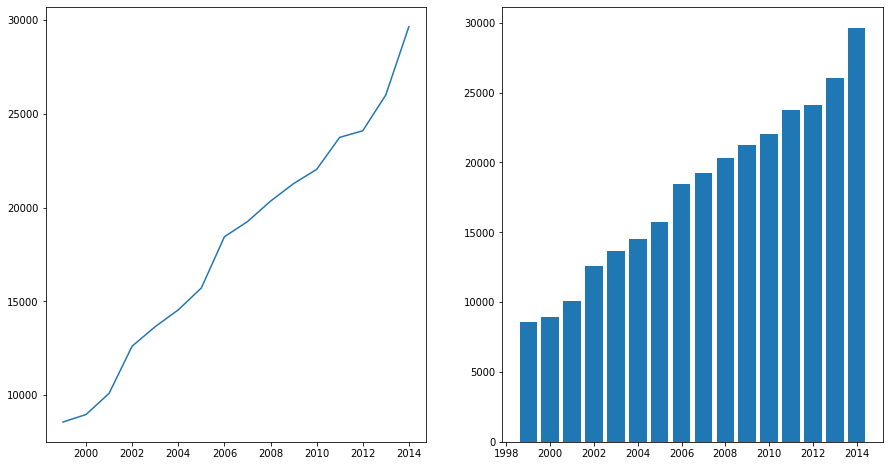

In [9]:
yearly_deaths = df_cleaned.groupby('year')['deaths'].sum().sort_values(ascending=False)
display(yearly_deaths)

fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(yearly_deaths.index, yearly_deaths)
ax[1].bar(yearly_deaths.index, yearly_deaths)

Year 2014 saw the largest number of deaths due to opioids overdose. In fact, death rate due to opioids overdose is increasing year by year. In 16 years, death rates have almost quadrupled. This is an alarming situation for a country. It should raise all the red flags within any organization working in the public interest.

year
1999    268200721
2000    271146640
2001    282443550
2002    285084651
2003    285814877
2004    290992201
2005    293689407
2006    297207823
2007    299898085
2008    304093966
2009    305514333
2010    308072947
2011    310907985
2012    313214412
2013    315405446
2014    318857056
Name: population, dtype: int64

<BarContainer object of 16 artists>

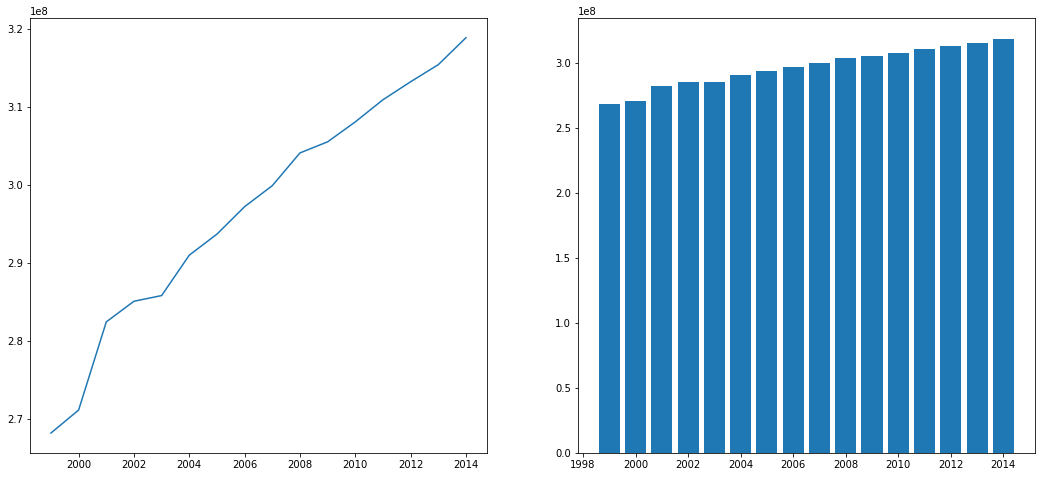

In [10]:
yearly_population = df_cleaned.groupby('year')['population'].sum()
display(yearly_population)

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].plot(yearly_population.index, yearly_population)
ax[1].bar(yearly_population.index, yearly_population)

If you just look at the line chart, it looks like an explosive growth in population. But then if you draw a bar chart, you see the difference. The line chart gives us a a wrong overview of the population increase because the y-axis scale is different. In fact, y-axis scale of line chart is quite misleading (though both are using the default scale whatever matplotlib provides)

To have clean comparison, let's use similar (and not misleading) values for the y-axis for both kinds of charts. Since y-axis values range from **2.5e8 - 3.2e8**. We can use a range from **2e8 - 4e8**

Now you will see that rise in population is there but it is not as explosive as line chart made us believe the first time. We will also reduce the height of the charts to make it look more appealing

(200000000.0, 400000000.0)

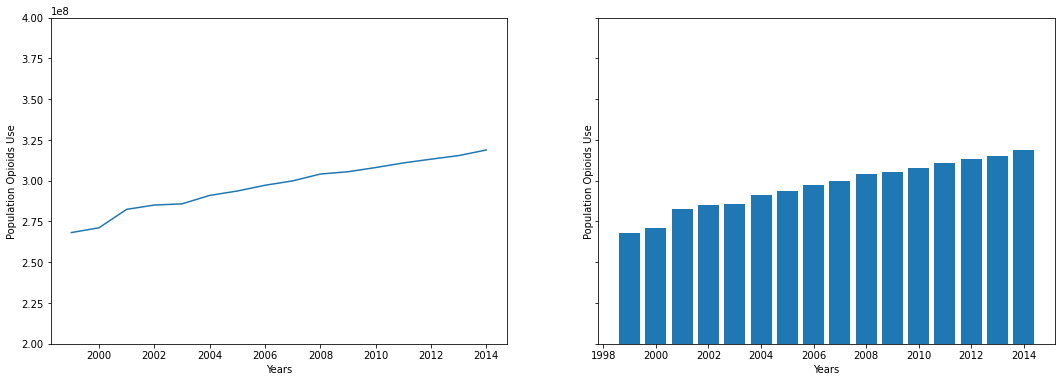

In [11]:
fig3, ax3 = plt.subplots(1,2, figsize=(18,6), sharey=True)
ax3[0].plot(yearly_population.index, yearly_population)
ax3[0].set_xlabel('Years')
ax3[0].set_ylabel('Population Opioids Use')

ax3[1].bar(yearly_population.index, yearly_population)
ax3[1].set_xlabel('Years')
ax3[1].set_ylabel('Population Opioids Use')

plt.ylim(2e8, 4e8)



## CRUDE RATE & CONFIDENCE INTERVAL

Cruade rate is the total number of events occurring in an entire population over a period of time, without reference to any of the individuals or subgroups within the population. 


We indicate a confidence interval by its endpoints; for example, the 90% confidence interval for the number of people in poverty in the United States in 1995 is "35,534,124 to 37,315,094." If we were to repeatedly make new estimates using exactly the same procedure (by drawing a new sample, conducting new interviews etc), 90% of the time the estimate will fall within the range given above. 


SOURCE: [The Free Dictionary](https://medical-dictionary.thefreedictionary.com/crude+rate), [United States Census Bureau](https://www.census.gov/programs-surveys/saipe/guidance/confidence-intervals.html)

You can check out a small example of how to calculate Crude Rate at [Boston University School of Public Health](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/EP/EP713_StandardizedRates/EP713_StandardizedRates2.html) by *Wayne W. LaMorte*

In [12]:
# Let's check the crude rate by state
df_cleaned.groupby('state')['crude rate'].mean().sort_values(ascending=False)

state
West Virginia           16.906250
Nevada                  14.743750
New Mexico              12.625000
Utah                    12.325000
Rhode Island            10.906250
Maryland                10.400000
Oklahoma                10.050000
Massachusetts            9.531250
Washington               9.181250
Alaska                   9.140000
Kentucky                 9.137500
New Hampshire            8.881250
Oregon                   8.293750
Vermont                  8.240000
Wyoming                  7.937500
District of Columbia     7.786667
Delaware                 7.768750
Maine                    7.531250
Arizona                  7.512500
Tennessee                7.468750
Ohio                     7.400000
North Carolina           7.081250
Florida                  6.843750
Missouri                 6.831250
Connecticut              6.650000
Colorado                 6.631250
Illinois                 6.425000
Wisconsin                5.993750
Virginia                 5.793750
Montana 

What we have done is taken the *mean* of all the crude rates for a particular state. We can see that even though California has the highest number of opioid overdose deaths, its crude rate is only 25% of the maximum value. New York and Florida are similar too in that aspect. I don't know what more I can make out of it for I have never studied Statistics. 

# More To Come

## Once I learn more about how to analyze datasets and more visualization techniques, I will come back here and update this notebook.